## Логистическая регрессия

In [ ]:
# Срок сдачи: 7 декабря 2023 года 10:00, далее -4 балла

 Моделирование принятия решения о финансировании проекта венчурным фондом

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from collections.abc import Mapping
# import statsmodels.api as sm

### К сожалению на версиях python>= 3.10 проблемы с statsmodel.api, а конкретно с методом Mapping из collections, поэтому пришлось делать без этого

In [2]:
data=pd.read_excel('data_seminar11.xlsx')

### Описание переменных

__Result__ - проект поддержан фондом (0-нет, 1 –да);
***
__age__ - возраст руководителя;  
__compet__ -оценка уровня конкуренции (1-5);  
__complexity__- оценка технологической сложности проекта (1-5);  
__cost__- объем денежных средств, необходимых для поддержки проекта, млн. руб.;  
__eco__- влияние используемой технологии на окружающую среду (0-негативное, 5-нейтральное, 10- экологичное решение);  
__fin_support__ - финансовая поддержка правительства;  
__foreigners__- наличие иностранных участников (1- есть, 0 –нет);

__investors__ - количество инвесторов;   
__market__- наиболее важный рынок сбыта 1- местный, региональный, 2-общероссийский, 3-стран СНГ, 4 – европейский, 5 –другие;  
__non-discl__- наличие соглашений о неразглашении (с персоналом или партнерами);  
__npv__- чистая приведенная стоимость проекта, млн. руб.;  
__own_res__ - доля собственных ресурсов, %;  
__patent__ - существует ли возможность получения патента (1-существует, 0-нет);  
__phd__ - доля персонала с ученой степенью;  

__potential__ - оценка потенциала рынка (% возможной доли рынка);  
__pp__- срок окупаемости проекта, мес.;  
__rd__ - потребность в проведении дополнительных исследований и разработок (0-нет, 1- необходимы);  
__risks__ - экспертная оценка рисков проекта (1-10);  
__stage__ - стадия реализации проекта (1-5);  
__success__- количество успешных проектов у руководителя;  
__support__ - нефинансовая поддержка правительства (льготные условия для аренды помещений, земли, приобретения лицензий);   
__unic__ - уникальность технологии (1- технология уникальна, 0- технология известна на рынке).

In [3]:
data.describe()

,Result,stage,cost,patent,rd,eco,npv,pp,phd,foreigners,...,unic,potential,fin_support,age,success,compet,investors,support,complexity,non_discl
count,1458.00000,1392.000000,1458.000000,1458.000000,1458.000000,1458.000000,1387.000000,1387.000000,1347.000000,1458.000000,...,1293.000000,1458.000000,1458.000000,1425.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,0.23594,15.957615,11.173663,0.120027,5.687243,4.283265,7.870995,47.795242,0.205791,0.126886,...,0.156999,5.183258,0.155693,46.208421,549.280521,2.794239,3.430727,0.225652,2.626886,0.057613
std,0.42473,20.023324,7.148868,0.325105,73.882121,2.509558,5.494646,28.582781,0.367084,0.332960,...,0.363941,11.925479,0.362688,6.554070,12041.824814,1.384360,1.831904,0.418154,0.929582,0.233090
min,0.00000,1.000000,0.400000,0.000000,0.000000,0.000000,0.220000,4.000000,0.000000,0.000000,...,0.000000,0.040000,0.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,0.00000,3.000000,5.700000,0.000000,0.000000,5.000000,3.405000,26.000000,0.000000,0.000000,...,0.000000,0.200000,0.000000,42.000000,1.000000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,0.00000,4.000000,10.000000,0.000000,0.000000,5.000000,6.800000,43.000000,0.000000,0.000000,...,0.000000,0.310000,0.000000,46.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000
75%,0.00000,40.000000,15.300000,0.000000,0.000000,5.000000,10.995000,63.000000,0.300000,0.000000,...,0.000000,0.470000,0.000000,50.000000,4.000000,4.000000,4.000000,0.000000,3.000000,0.000000
max,1.00000,64.000000,39.000000,1.000000,1000.000000,10.000000,34.220000,149.000000,1.600000,1.000000,...,1.000000,72.000000,1.000000,65.000000,265653.000000,5.000000,13.000000,1.000000,4.000000,1.000000


In [4]:
data.describe().round()

,Result,stage,cost,patent,rd,eco,npv,pp,phd,foreigners,...,unic,potential,fin_support,age,success,compet,investors,support,complexity,non_discl
count,1458.0,1392.0,1458.0,1458.0,1458.0,1458.0,1387.0,1387.0,1347.0,1458.0,...,1293.0,1458.0,1458.0,1425.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0
mean,0.0,16.0,11.0,0.0,6.0,4.0,8.0,48.0,0.0,0.0,...,0.0,5.0,0.0,46.0,549.0,3.0,3.0,0.0,3.0,0.0
std,0.0,20.0,7.0,0.0,74.0,3.0,5.0,29.0,0.0,0.0,...,0.0,12.0,0.0,7.0,12042.0,1.0,2.0,0.0,1.0,0.0
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,22.0,0.0,1.0,1.0,0.0,1.0,0.0
25%,0.0,3.0,6.0,0.0,0.0,5.0,3.0,26.0,0.0,0.0,...,0.0,0.0,0.0,42.0,1.0,2.0,2.0,0.0,2.0,0.0
50%,0.0,4.0,10.0,0.0,0.0,5.0,7.0,43.0,0.0,0.0,...,0.0,0.0,0.0,46.0,3.0,3.0,3.0,0.0,3.0,0.0
75%,0.0,40.0,15.0,0.0,0.0,5.0,11.0,63.0,0.0,0.0,...,0.0,0.0,0.0,50.0,4.0,4.0,4.0,0.0,3.0,0.0
max,1.0,64.0,39.0,1.0,1000.0,10.0,34.0,149.0,2.0,1.0,...,1.0,72.0,1.0,65.0,265653.0,5.0,13.0,1.0,4.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Result       1458 non-null   int64  
 1   stage        1392 non-null   float64
 2   cost         1458 non-null   float64
 3   patent       1458 non-null   int64  
 4   rd           1458 non-null   int64  
 5   eco          1458 non-null   int64  
 6   npv          1387 non-null   float64
 7   pp           1387 non-null   float64
 8   phd          1347 non-null   float64
 9   foreigners   1458 non-null   int64  
 10  university   1458 non-null   int64  
 11  market       1458 non-null   int64  
 12  risks        1458 non-null   int64  
 13  own_res      1458 non-null   float64
 14  unic         1293 non-null   float64
 15  potential    1458 non-null   float64
 16  fin_support  1458 non-null   int64  
 17  age          1425 non-null   float64
 18  success      1458 non-null   int64  
 19  compet

In [6]:
data["Result"].value_counts()

Result
0    1114
1     344
Name: count, dtype: int64

In [7]:
data.isnull().sum()

Result           0
stage           66
cost             0
patent           0
rd               0
eco              0
npv             71
pp              71
phd            111
foreigners       0
university       0
market           0
risks            0
own_res          0
unic           165
potential        0
fin_support      0
age             33
success          0
compet           0
investors        0
support          0
complexity       0
non_discl        0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.head()

,Result,stage,cost,patent,rd,eco,npv,pp,phd,foreigners,...,unic,potential,fin_support,age,success,compet,investors,support,complexity,non_discl
0,0,4.0,3.5,0,0,5,0.89,46.0,0.1,0,...,0.0,0.17,0,39.0,0,1,10,0,2,0
1,0,2.0,13.3,0,1,0,13.37,66.0,0.2,0,...,0.0,0.16,0,36.0,2,1,3,0,3,0
2,1,4.0,5.2,0,0,5,11.73,12.0,0.2,0,...,0.0,0.17,0,46.0,1,3,2,0,3,0
3,0,5.0,7.4,0,0,5,9.72,38.0,0.2,0,...,0.0,0.22,0,45.0,3,1,2,0,2,0
4,0,3.0,4.0,0,0,5,24.77,85.0,0.3,0,...,1.0,0.53,0,55.0,5,1,7,0,4,0


# Исправление ошибок в данных

In [10]:
# Список данных, содержащих ошибки:....
#data = data.dropna()

columns_with_nan = data.columns[data.isnull().any()]
print(columns_with_nan)

Index(['stage', 'npv', 'pp', 'phd', 'unic', 'age'], dtype='object')


In [11]:
# Ваш код для исправления ошибок в данных (без удаления наблюдений)

mean_values = data.mean()
data = data.fillna(mean_values).apply(np.floor)

## 2. Предварительный анализ данных

1. Построить диаграммы распределений stage и совместных распределений stage c Result, а также stage с другими 
    параметрами. Дать интерпретацию полученным результатам.  
2. Построить диаграммы распределений cost и совместных распределений cost c Result, а также cost с другими  
    параметрами. Дать интерпретацию полученным результатам.  
3. Построить диаграммы распределений npv и совместных распределений npv c Result, а также npv с другими  
    параметрами. Дать интерпретацию полученным результатам. 

## 3. Обучение логистической регрессии с нормировкой MinMax

In [12]:
data.dropna(inplace=True)

y=data.Result
X=data.drop(columns=['Result'])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X)
X_minmax=scaler_minmax.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
clf_minmax=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_minmax = clf_minmax.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_minmax = confusion_matrix(y_test, y_pred_minmax)
print ("Confusion Matrix : \n", cm_minmax)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred_minmax))

from sklearn.metrics import roc_auc_score
print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_minmax))

Confusion Matrix : 
 [[351  22]
 [ 47  62]]
Accuracy :  0.8568464730290456
Roc-auc score: 
 0.7549130531027868


In [14]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)


from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8423236514522822
Confusion Matrix:
[[350  23]
 [ 53  56]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       373
         1.0       0.71      0.51      0.60       109

    accuracy                           0.84       482
   macro avg       0.79      0.73      0.75       482
weighted avg       0.83      0.84      0.83       482



## 4. Обучение логистической регрессии с нормировкой StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
scaler_standard.fit(X)
X_standard=scaler_standard.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
clf_standard=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_standard = clf_standard.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_standard = confusion_matrix(y_test, y_pred_standard)
print ("Confusion Matrix : \n", cm_standard)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred_standard))

from sklearn.metrics import roc_auc_score
print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_standard))

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)


from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Confusion Matrix : 
 [[350  23]
 [ 43  66]]
Accuracy :  0.8630705394190872
Roc-auc score: 
 0.7719211943822711
Accuracy: 0.8609958506224067
Confusion Matrix:
[[350  23]
 [ 44  65]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       373
         1.0       0.74      0.60      0.66       109

    accuracy                           0.86       482
   macro avg       0.81      0.77      0.79       482
weighted avg       0.85      0.86      0.86       482



## 5. Feature selection

В этом пунке необходимо выполнить отбор 5 наиболее значимых переменных. Отбор может осуществляться на основании:
- интуиции;
- оценки корреляций переменных;
- алгоритмов feature selection (sklearn.feature_selection).

<Axes: >

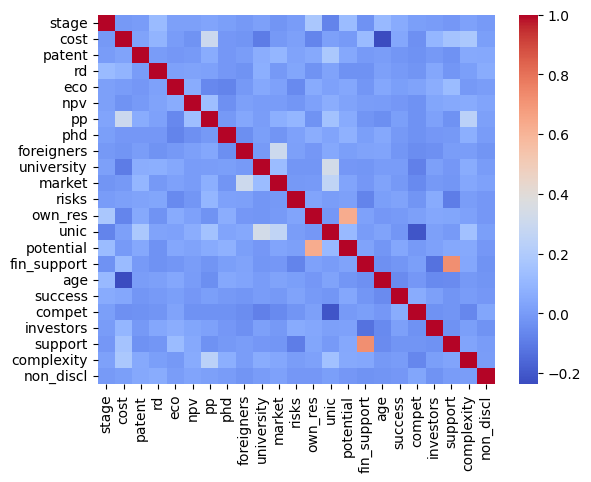

In [16]:
sns.heatmap(X.corr(), cmap='coolwarm')

In [17]:
pd.DataFrame(data=dict(features=X.columns, coefficients=clf_standard.coef_[0])).sort_values('coefficients', \
                                                                                        ascending=False)

,features,coefficients
4,eco,0.561908
20,support,0.486210
13,unic,0.220245
5,npv,0.207597
12,own_res,0.151977
15,fin_support,0.128035
22,non_discl,0.077982
9,university,0.054760
0,stage,0.053174
18,compet,0.015742


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

feature_names = data.columns
k_best = SelectKBest(chi2, k=5)
X_new = k_best.fit_transform(X, y)
selected_features_indices = k_best.get_support(indices=True)
selected_feature_names = feature_names[selected_features_indices]
print("Selected Feature Names:", selected_feature_names)
new_data = pd.DataFrame(X_new, columns=selected_feature_names)
print("Selected Features DataFrame:")
print(new_data)

Selected Feature Names: Index(['patent', 'rd', 'npv', 'risks', 'age'], dtype='object')
Selected Features DataFrame:
      patent    rd   npv  risks  age
0        0.0   5.0  46.0    0.0  0.0
1        1.0   0.0  66.0    0.0  2.0
2        0.0   5.0  12.0    0.0  1.0
3        0.0   5.0  38.0    0.0  3.0
4        0.0   5.0  85.0    0.0  5.0
...      ...   ...   ...    ...  ...
1453     0.0   5.0  50.0    0.0  5.0
1454     0.0   5.0  77.0    0.0  1.0
1455     0.0   5.0  93.0    0.0  1.0
1456     0.0  10.0  40.0    0.0  5.0
1457     0.0   5.0  41.0    0.0  0.0

[1458 rows x 5 columns]


In [19]:
for feature in X.columns:
    if feature in new_data.columns:
        print(f"True - {feature}")
    else:
        print(f"False - {feature}")

False - stage
False - cost
True - patent
True - rd
False - eco
True - npv
False - pp
False - phd
False - foreigners
False - university
False - market
True - risks
False - own_res
False - unic
False - potential
False - fin_support
True - age
False - success
False - compet
False - investors
False - support
False - complexity
False - non_discl


### 6. Обучение логистической регрессии с отобранными признаками

In [20]:
y=data.Result
X=new_data
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X)
X_minmax=scaler_minmax.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.33, random_state=42)


clf_minmax=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_minmax = clf_minmax.predict(X_test)


cm_minmax = confusion_matrix(y_test, y_pred_minmax)
print ("Confusion Matrix : \n", cm_minmax)


print ("Accuracy : ", accuracy_score(y_test, y_pred_minmax))


print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_minmax))

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)


from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Confusion Matrix : 
 [[372   1]
 [ 78  31]]
Accuracy :  0.8360995850622407
Roc-auc score: 
 0.6408613522886588
Accuracy: 0.8340248962655602
Confusion Matrix:
[[373   0]
 [ 80  29]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       373
         1.0       1.00      0.27      0.42       109

    accuracy                           0.83       482
   macro avg       0.91      0.63      0.66       482
weighted avg       0.86      0.83      0.79       482



In [21]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
scaler_standard.fit(X)
X_standard=scaler_standard.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
clf_standard=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_standard = clf_standard.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_standard = confusion_matrix(y_test, y_pred_standard)
print ("Confusion Matrix : \n", cm_standard)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred_standard))

from sklearn.metrics import roc_auc_score
print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_standard))

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)


from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Confusion Matrix : 
 [[371   2]
 [ 78  31]]
Accuracy :  0.8340248962655602
Roc-auc score: 
 0.6395208697149323
Accuracy: 0.8340248962655602
Confusion Matrix:
[[371   2]
 [ 78  31]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       373
         1.0       0.94      0.28      0.44       109

    accuracy                           0.83       482
   macro avg       0.88      0.64      0.67       482
weighted avg       0.85      0.83      0.80       482



### 7. Интерпретация полученной модели

Модель, включавшая в себя все коэффициенты оказалась точнее модели на 5 параметрах, на обоих видах нормировки, отличия незначительны в случае MinMax нормировки, однако на нормировке StandartScaler разница достаточна, чтобы ее учитывать, поэтому лучшая из моделей логистической регрессии- StandartScaler нормировка на всех изначальных признаках.